# Linear Regression

$$ y = m * X + c $$

## Linear Regression Purpose

* It is one of the earliest and most popular Machine Learning Algorithm
* It is a Statistical method used for predictive analysis
* It is a Supervised Machine Learning model in which the model finds the best fit linear line between dependant and independant variable

<img src = "https://static.javatpoint.com/tutorial/machine-learning/images/linear-regression-in-machine-learning.png">

In [39]:
import pandas as pd
import numpy as np

In [40]:
# Taking sample data
data = {"X" : list(range(1,8)),
       "Y" : [1.5,3.8,6.7,9.0,11.2,13.6,16.0]}

In [41]:
# Converting data to DataFrame
df = pd.DataFrame(data=data)
df

,X,Y
0,1,1.5
1,2,3.8
2,3,6.7
3,4,9.0
4,5,11.2
5,6,13.6
6,7,16.0


In [42]:
# Finding multiplication of X and Y
df['SumX_Y'] = df['X'] * df['Y']
df['SumX_Y']

0      1.5
1      7.6
2     20.1
3     36.0
4     56.0
5     81.6
6    112.0
Name: SumX_Y, dtype: float64

In [43]:
# Finding square of X
df['Sqr_X'] = df['X'] ** 2
df['Sqr_X']

0     1
1     4
2     9
3    16
4    25
5    36
6    49
Name: Sqr_X, dtype: int64

In [44]:
df

,X,Y,SumX_Y,Sqr_X
0,1,1.5,1.5,1
1,2,3.8,7.6,4
2,3,6.7,20.1,9
3,4,9.0,36.0,16
4,5,11.2,56.0,25
5,6,13.6,81.6,36
6,7,16.0,112.0,49


# Finding Least Square Regression (M)

* Slope of the line
* It is a method which minimizes the error in such a way that the sum of all square error is minimized

$$ m = \frac{(n * \sum_{i=0}^{n} X_{i} * Y_{i}) - (\sum_{i=0}^{n} X * \sum_{i=0}^{n} Y)}{(n*\sum_{i=0}^{n}X^{2}) - (\sum_{i=0}^{n}X)^{2}} $$

# Finding B

$$ b = \frac{\sum_{i=0}^{n} Y_{i} - m * \sum_{i=0}^{n} X_{i}}{n} $$

# Squared Error

$$ ss = \sum_{i=0}^{n} (Y_{org} - y_{pred}) ^ {2} $$

# Mean Squared Error (MSE)

* MSE is defined as Mean or Average of the square of the difference between actual and estimated values

$$ mse = \frac{\sum_{i=0}^{n} (Y_{org} - y_{pred}) ^ {2}}{n} $$

# Mean Absolute Error (MAE)

* MAE is the sum of absolute difference between actual and predicted values.

$$ mae = \frac{\sum_{i=0}^{n} (Y_{org} - y_{pred})}{n} $$

In [127]:
df['y_pred'] = [(m*x_val) + b for x_val in df['X']]
df

,X,Y,SumX_Y,Sqr_X,y_pred
0,1,1.5,1.5,1,1.585714
1,2,3.8,7.6,4,4.000000
2,3,6.7,20.1,9,6.414286
3,4,9.0,36.0,16,8.828571
4,5,11.2,56.0,25,11.242857
5,6,13.6,81.6,36,13.657143
6,7,16.0,112.0,49,16.071429


In [64]:
y_org = df['Y']
y_org

0     1.5
1     3.8
2     6.7
3     9.0
4    11.2
5    13.6
6    16.0
Name: Y, dtype: float64

In [102]:
df

,X,Y,SumX_Y,Sqr_X,y_pred
0,1,1.5,1.5,1,1.585714
1,2,3.8,7.6,4,4.000000
2,3,6.7,20.1,9,6.414286
3,4,9.0,36.0,16,8.828571
4,5,11.2,56.0,25,11.242857
5,6,13.6,81.6,36,13.657143
6,7,16.0,112.0,49,16.071429


In [165]:
# Calculating mean square error (mse) and mean absolute error (mae)

class LinearRegression:
    
    def __init__(self, df):
        self.sum_xy = df['SumX_Y'].sum()
        self.sum_x = df['X'].sum()
        self.sum_y = df['Y'].sum()
        self.sqr_x = df['Sqr_X'].sum()
        self.sumX_h_2 = sum_x ** 2 
        self.n = len(df)
        
    def m(self, sum_xy, sum_x, sum_y, sqr_x, sumX_h_2, n):   # To find m value
        self.numerator = n*((sum_xy)) - (sum_x) * (sum_y)
        self.denominator = n*((sqr_x)) - (sumX_h_2)
        self.m = self.numerator / self.denominator
        
        return self.m
    
    def b(self, n, sum_x, sum_y):                                            # TO find b value
        self.numerator_b = ((sum_y) - (m * sum_x))
        self.denominator_b = n
        self.b = self.numerator_b / self.denominator_b
        return self.b
    
    def fit_train(self, m, b , df):                           ## To find ypred (y= mx + b)
        self.y_pred = [(m*x_val) + b for x_val in df['X']]
        return self.y_pred
    
    def mse(self, df, y_pred):                        # To find mse
        mse = sum([(y_org - y_pred)**2 for y_org, y_pred in zip(df['Y'],y_pred)]) / n
        return mse
    
    def mae(self, df, y_pred):
        mae = sum([(abs(y_org - y_pred)) for y_org, y_pred in zip(df['Y'], y_pred)]) / n
        return mae

In [166]:
# object declaration for m(slope)
m_obj = LinearRegression(df)

# object.methodname
m_obj.m(sum_xy, sum_x, sum_y, sqr_x, sumX_h_2, n)

# printing the m value
print("m value is: ", m)

m value is:  2.4142857142857133


In [167]:
# object declaration for b(constant)
b_obj = LinearRegression(df)

# object.methodname
b_obj.b(n, sum_x, sum_y)

# printing the b value
print("b value is: ", b)

b value is:  -0.8285714285714231


In [168]:
# object declaration for y-predictions(y = m * x + b)
ypred_obj = LinearRegression(df)

# object.methodname
ypred_obj.fit_train(m, b , df)

# printing the b value
print("y-predicted values are: ", y_pred)

y-predicted values are:  0     1.585714
1     4.000000
2     6.414286
3     8.828571
4    11.242857
5    13.657143
6    16.071429
Name: y_pred, dtype: float64


In [177]:
# object declaration for Mean Square Error (mse). If mse is nearer to 0 its good or nearer to 1 its bad
mse_obj = LinearRegression(df)

# object.methodname
mse_obj.mse(df, y_pred)

# printing the b value
print("Mean Square Error value is: ", mse)

Mean Square Error value is:  0.024081632653061246


In [178]:
# object declaration for Mean Absolute Error (mae)
mae_obj = LinearRegression(df)

# object.methodname
mae_obj.mae(df, y_pred)

# printing the b value
print("Mean Absolute Error value is: ", mae)

Mean Absolute Error value is:  -1.3322676295501878e-15


In [188]:
# Finding Sum of Square of Residuals (Rss)
Rss = sum([(y_org - y_pred)**2 for y_org, y_pred in zip(df['Y'], df['y_pred'])])
rss

0.16857142857142873

In [189]:
# Total sum of squares calculating with mean (Tss)
Tss = sum((y_org - y_mean)**2)

tss

163.37428571428572

In [190]:
# Calculating R2 score. if R2 score = 1 or nearer to 1 its good and if its nearer to 0 or equalto zero its bad
r_squared = 1 - (Rss/Tss)
r_squared

0.99896818873402

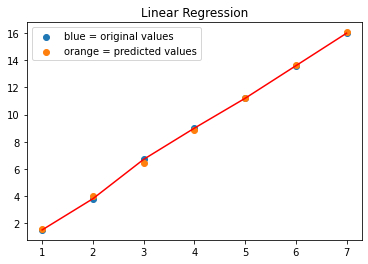

In [191]:
# graph using matplotlib
import matplotlib.pyplot as plt

x_val = df['X']
y_val = df['Y']
ypred = y_pred

plt.plot(x_val, y_val, color = 'r')

# for original values
plt.scatter(x_val,y_org, label = 'blue = original values')

# for predicted values
plt.scatter(x_val,ypred, label = 'orange = predicted values')

# for tittle of the graph
plt.title("Linear Regression")

# for showing legend in graph
plt.legend()

# For showing the plot
plt.show()
